In [1]:
import sys
#sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format

In [10]:
df = pd.read_parquet("../data/raw/green_tripdata_2021-01.parquet")
df.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.00,43,151,1.00,1.01,5.50,0.50,0.50,0.00,0.00,None,0.30,6.80,2.00,1.00,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.00,166,239,1.00,2.53,10.00,0.50,0.50,2.81,0.00,None,0.30,16.86,1.00,1.00,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.00,41,42,1.00,1.12,6.00,0.50,0.50,1.00,0.00,None,0.30,8.30,1.00,1.00,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.00,168,75,1.00,1.99,8.00,0.50,0.50,0.00,0.00,None,0.30,9.30,2.00,1.00,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.00,265,265,3.00,0.00,-52.00,0.00,-0.50,0.00,0.00,None,-0.30,-52.80,3.00,1.00,0.00
5,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.00,265,265,3.00,0.00,52.00,0.00,0.50,0.00,0.00,None,0.30,52.80,2.00,1.00,0.00
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.00,265,265,1.00,0.00,180.00,0.00,0.00,36.06,0.00,None,0.30,216.36,1.00,2.00,0.00
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.00,75,75,6.00,0.45,3.50,0.50,0.50,0.96,0.00,None,0.30,5.76,1.00,1.00,0.00
8,2,2021-01-01 00:57:46,2021-01-01 00:57:57,N,1.00,225,225,1.00,0.00,2.50,0.50,0.50,0.00,0.00,None,0.30,3.80,2.00,1.00,0.00
9,2,2021-01-01 00:58:32,2021-01-01 01:32:34,N,1.00,225,265,1.00,12.19,38.00,0.50,0.50,2.75,0.00,None,0.30,42.05,1.00,1.00,0.00


In [2]:
test_df = pd.read_parquet("../data/raw/green_tripdata_2021-03.parquet")
test_df.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-03-01 00:05:42,2021-03-01 00:14:03,N,1.00,83,129,1.00,1.56,7.50,0.50,0.50,0.00,0.00,None,0.30,8.80,1.00,1.00,0.00
1,2,2021-03-01 00:21:03,2021-03-01 00:26:17,N,1.00,243,235,1.00,0.96,6.00,0.50,0.50,0.00,0.00,None,0.30,7.30,2.00,1.00,0.00
2,2,2021-03-01 00:02:06,2021-03-01 00:22:26,N,1.00,75,242,1.00,9.93,28.00,0.50,0.50,2.00,0.00,None,0.30,31.30,1.00,1.00,0.00
3,2,2021-03-01 00:24:03,2021-03-01 00:31:43,N,1.00,242,208,1.00,2.57,9.50,0.50,0.50,0.00,0.00,None,0.30,10.80,2.00,1.00,0.00
4,1,2021-03-01 00:11:10,2021-03-01 00:14:46,N,1.00,41,151,1.00,0.80,5.00,0.50,0.50,1.85,0.00,None,0.30,8.15,1.00,1.00,0.00
5,2,2021-03-01 00:56:32,2021-03-01 01:03:48,N,1.00,173,56,1.00,1.12,7.00,0.50,0.50,0.00,0.00,None,0.30,8.30,2.00,1.00,0.00
6,2,2021-03-01 00:11:06,2021-03-01 00:13:25,N,1.00,75,75,1.00,0.38,-3.50,-0.50,-0.50,0.00,0.00,None,-0.30,-4.80,3.00,1.00,0.00
7,2,2021-03-01 00:11:06,2021-03-01 00:13:25,N,1.00,75,75,1.00,0.38,3.50,0.50,0.50,0.00,0.00,None,0.30,4.80,2.00,1.00,0.00
8,2,2021-03-01 00:16:16,2021-03-01 00:28:22,N,1.00,43,24,1.00,1.73,9.50,0.50,0.50,3.00,0.00,None,0.30,13.80,1.00,1.00,0.00
9,2,2021-03-01 01:12:01,2021-03-01 01:16:04,N,1.00,107,170,1.00,0.00,11.00,0.50,0.50,0.00,0.00,None,0.30,15.05,2.00,1.00,2.75


In [3]:
test_df.shape

(83827, 20)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               76518 non-null  int64         
 1   lpep_pickup_datetime   76518 non-null  datetime64[us]
 2   lpep_dropoff_datetime  76518 non-null  datetime64[us]
 3   store_and_fwd_flag     40471 non-null  object        
 4   RatecodeID             40471 non-null  float64       
 5   PULocationID           76518 non-null  int64         
 6   DOLocationID           76518 non-null  int64         
 7   passenger_count        40471 non-null  float64       
 8   trip_distance          76518 non-null  float64       
 9   fare_amount            76518 non-null  float64       
 10  extra                  76518 non-null  float64       
 11  mta_tax                76518 non-null  float64       
 12  tip_amount             76518 non-null  float64       
 13  t

**Exploratory analysis**

In [12]:
# Missing values
missing = df.isna().sum().sort_values(ascending = False)
print("Missing values: \n", missing)

Missing values: 
 ehail_fee                76518
congestion_surcharge     36047
trip_type                36047
store_and_fwd_flag       36047
RatecodeID               36047
payment_type             36047
passenger_count          36047
tip_amount                   0
total_amount                 0
improvement_surcharge        0
tolls_amount                 0
VendorID                     0
mta_tax                      0
lpep_pickup_datetime         0
fare_amount                  0
trip_distance                0
DOLocationID                 0
PULocationID                 0
lpep_dropoff_datetime        0
extra                        0
dtype: int64


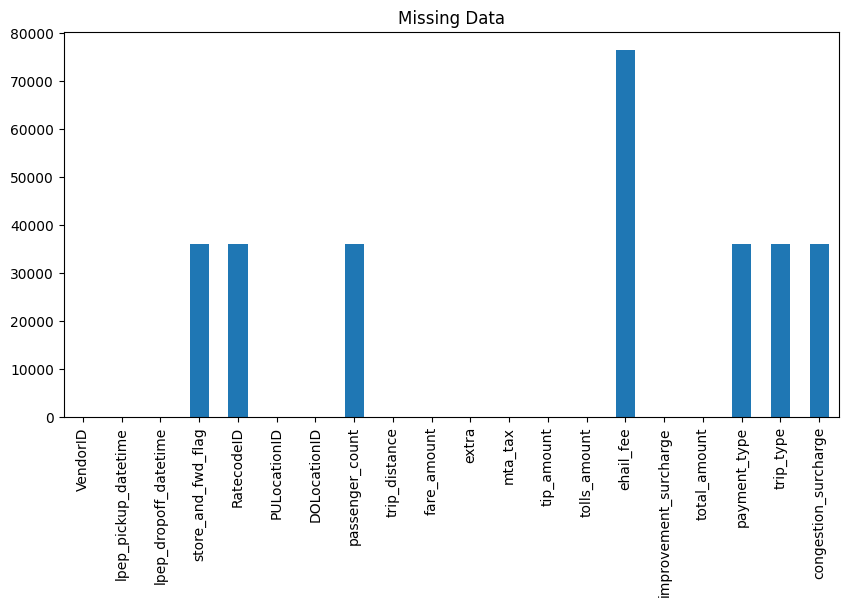

In [14]:
plt.figure(figsize=(10, 5))
df.isna().sum().plot(kind="bar")
plt.title("Missing Data")
plt.show()

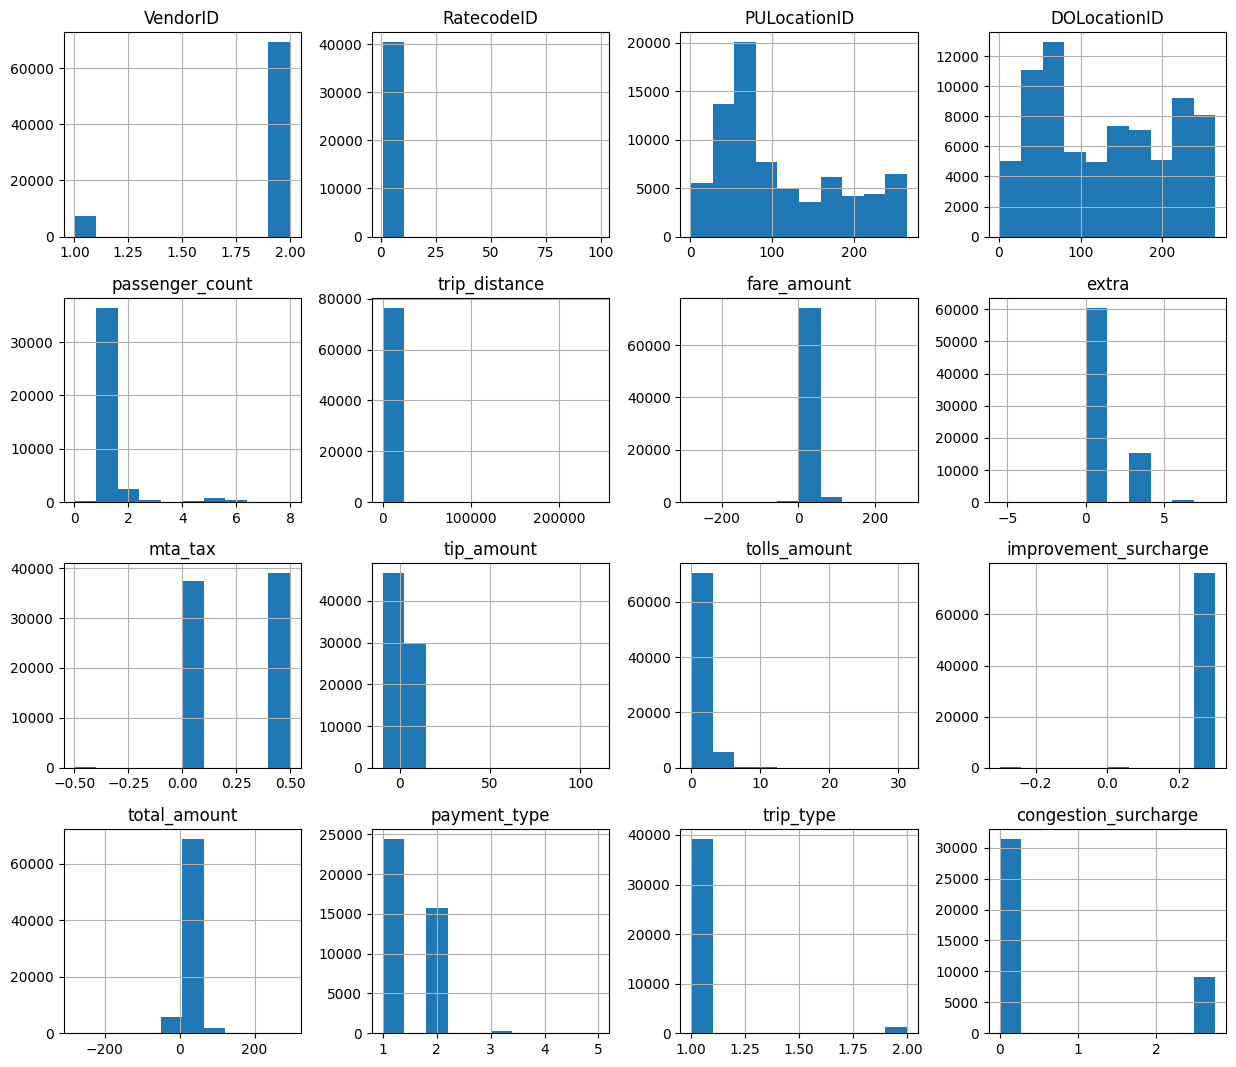

In [15]:
# Distribution of numeric values
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns.to_list()

df[numeric_columns].hist(figsize=(15, 13))
plt.show()

Above histograms show that the numerical features are heavily skewed

Since we want to build a machine learning algorithm that predicts the duration a trip will take, we consider the following features:

y variable - Duration: Calculated by tpep_dropoff_datetime - tpep_pickup_datetime

X variables - Pick up and drop off location IDs: PULocationID, DOLocationID, Trip distance, time features (hour of the day, day of the week, and if it's a weekend)

In [16]:
print(df.PULocationID.value_counts())
print(df.DOLocationID.value_counts())

PULocationID
74     6696
75     6196
41     4194
42     2796
244    2624
       ... 
27        1
12        1
253       1
187       1
176       1
Name: count, Length: 251, dtype: int64
DOLocationID
74     3161
75     2791
42     2698
41     2274
236    1424
       ... 
251       1
6         1
214       1
172       1
109       1
Name: count, Length: 256, dtype: int64


In [17]:
# Verify data types
print(df.lpep_dropoff_datetime.dtype)
print(df.lpep_pickup_datetime.dtype)

datetime64[us]
datetime64[us]


In [18]:
print(f"Minimum date: {df.lpep_pickup_datetime.min()}")
print(f"Maximum date: {df.lpep_pickup_datetime.max()}")

Minimum date: 2009-01-01 00:03:25
Maximum date: 2021-01-31 23:46:45


In [19]:
# Filter the data to remain with 2021 data only
df_2021 = df[df["lpep_pickup_datetime"].dt.year == 2021]
df_2021.shape

(76515, 20)

In [21]:
# Explore time features
df_2021["hour"] = df_2021["lpep_pickup_datetime"].dt.hour
df_2021["day_of_week"] = df_2021["lpep_pickup_datetime"].dt.day_name()

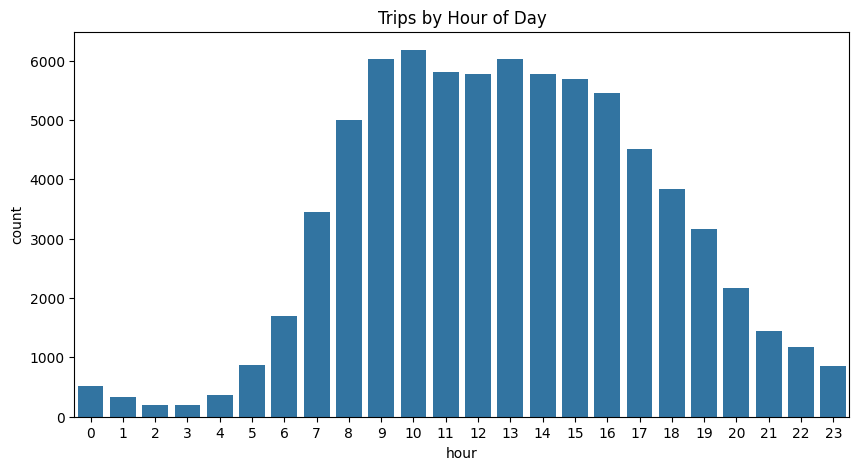

In [22]:
# Trip volume by hour
plt.figure(figsize=(10,5))
sns.countplot(x="hour", data=df_2021)
plt.title("Trips by Hour of Day")
plt.show()

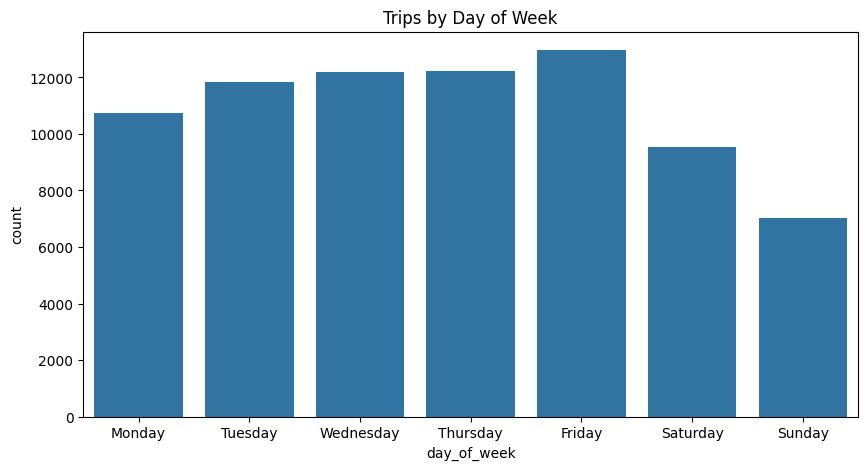

In [23]:
# Trip volume by day of week
plt.figure(figsize=(10,5))
sns.countplot(x="day_of_week", data=df_2021,
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Trips by Day of Week")
plt.show()

In [24]:
# Calculate duration for each trip
df_2021["duration"] = (df_2021["lpep_dropoff_datetime"] - df_2021["lpep_pickup_datetime"]).dt.total_seconds() / 60

In [25]:
df_2021.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,hour,day_of_week,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.00,43,151,1.00,1.01,5.50,0.50,0.50,0.00,0.00,None,0.30,6.80,2.00,1.00,0.00,0,Friday,3.93
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.00,166,239,1.00,2.53,10.00,0.50,0.50,2.81,0.00,None,0.30,16.86,1.00,1.00,2.75,0,Friday,8.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.00,41,42,1.00,1.12,6.00,0.50,0.50,1.00,0.00,None,0.30,8.30,1.00,1.00,0.00,0,Friday,5.97
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.00,265,265,3.00,0.00,-52.00,0.00,-0.50,0.00,0.00,None,-0.30,-52.80,3.00,1.00,0.00,0,Friday,0.07
5,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.00,265,265,3.00,0.00,52.00,0.00,0.50,0.00,0.00,None,0.30,52.80,2.00,1.00,0.00,0,Friday,0.07
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.00,265,265,1.00,0.00,180.00,0.00,0.00,36.06,0.00,None,0.30,216.36,1.00,2.00,0.00,0,Friday,0.12
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.00,75,75,6.00,0.45,3.50,0.50,0.50,0.96,0.00,None,0.30,5.76,1.00,1.00,0.00,0,Friday,2.32
8,2,2021-01-01 00:57:46,2021-01-01 00:57:57,N,1.00,225,225,1.00,0.00,2.50,0.50,0.50,0.00,0.00,None,0.30,3.80,2.00,1.00,0.00,0,Friday,0.18
9,2,2021-01-01 00:58:32,2021-01-01 01:32:34,N,1.00,225,265,1.00,12.19,38.00,0.50,0.50,2.75,0.00,None,0.30,42.05,1.00,1.00,0.00,0,Friday,34.03
10,2,2021-01-01 00:31:14,2021-01-01 00:55:07,N,1.00,244,244,2.00,3.39,18.00,0.50,0.50,0.00,0.00,None,0.30,19.30,2.00,1.00,0.00,0,Friday,23.88


In [28]:
df_2021["duration"].describe(percentiles=[0.95, 0.98, 0.99])

count   76515.00
mean       19.92
std        59.28
min         0.00
50%        13.88
95%        44.00
98%        56.00
99%        67.10
max      1439.60
Name: duration, dtype: float64

There are instances where the total duration of a trip was zero. The maximum time taken for a trip is 1439.60 minutes, which is unusual. Notably, 98% of the trips were within one hour. We filter out durations that are less than one minute and those greater than 60 mins

In [29]:
df_2021 = df_2021[(df_2021.duration >= 1) & (df_2021.duration <= 60)]

In [32]:
# Distribution of trip distance
df_2021.trip_distance.describe(percentiles=[0.25, 0.95, 0.98, 0.99])

count    73906.00
mean        42.05
std       1958.11
min          0.00
25%          1.34
50%          2.60
95%         15.36
98%         19.71
99%         23.13
max     244152.01
Name: trip_distance, dtype: float64

- There are trips whose distance = 0, while the maximum distance = 244152.01
- 99% of the trips had a distance less than or equal to 23.13

In [34]:
df_2021[df_2021.trip_distance >= 50]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,hour,day_of_week,duration
9239,2,2021-01-08 14:10:14,2021-01-08 14:31:11,N,5.00,15,16,1.00,244152.01,8.00,0.00,0.00,2.75,0.00,None,0.30,11.05,1.00,1.00,0.00,14,Friday,20.95
41521,2,2021-01-02 20:48:00,2021-01-02 21:36:00,None,NaN,136,225,NaN,129402.50,71.83,0.00,0.00,2.75,6.12,None,0.30,81.00,NaN,NaN,NaN,20,Saturday,48.00
41700,2,2021-01-03 10:00:00,2021-01-03 10:17:00,None,NaN,17,77,NaN,7696.50,23.31,0.00,0.00,2.75,0.00,None,0.30,26.36,NaN,NaN,NaN,10,Sunday,17.00
41701,2,2021-01-03 10:31:00,2021-01-03 10:43:00,None,NaN,35,61,NaN,7700.51,16.73,0.00,0.00,2.75,0.00,None,0.30,19.78,NaN,NaN,NaN,10,Sunday,12.00
41750,2,2021-01-03 11:04:00,2021-01-03 11:12:00,None,NaN,61,35,NaN,7702.63,16.73,0.00,0.00,2.75,0.00,None,0.30,19.78,NaN,NaN,NaN,11,Sunday,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74382,2,2021-01-29 10:58:00,2021-01-29 11:13:00,None,NaN,213,208,NaN,60382.70,22.79,2.75,0.00,0.00,0.00,None,0.30,25.84,NaN,NaN,NaN,10,Friday,15.00
74531,2,2021-01-29 11:39:00,2021-01-29 11:53:00,None,NaN,213,250,NaN,60382.70,17.60,2.75,0.00,0.00,0.00,None,0.30,20.65,NaN,NaN,NaN,11,Friday,14.00
75445,2,2021-01-30 06:29:00,2021-01-30 06:48:00,None,NaN,62,229,NaN,144948.19,34.62,2.75,0.00,0.00,0.00,None,0.30,37.67,NaN,NaN,NaN,6,Saturday,19.00
75754,2,2021-01-30 13:18:00,2021-01-30 13:27:00,None,NaN,83,129,NaN,31450.04,21.45,2.75,0.00,0.00,0.00,None,0.30,24.50,NaN,NaN,NaN,13,Saturday,9.00


Trips with distances greater than 50 don't match with the expected durations. These might be data entry errors, thus we filter

In [35]:
df_2021 = df_2021[(df_2021.trip_distance >= 1) & (df_2021.trip_distance <= 50)]

**Proceed to data preprocessing and model building**